Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp.

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau:

# Yêu cầu:

## 1. Đọc và xem thông tin dữ liệu
- đọc tập tin chipotle.tsv
- xem thông tin: shape, columns, head, tail, info

## 2. Xử lý Null và Duplicate
- cho biết số lượng Null xuất hiện trong df?
- cho biết số lượng dữ liệu trùng lắp ==> xóa các trùng lắp và giữ lại dữ liệu đầu tiên

## 3. Xử lý dữ liệu
- chuyển kiểu cột item_price sang kiểu float
- cho biết có bao nhiêu dữ liệu có item_price=0. Nếu có, hãy thay thế item_price = item_price trung bình
- tạo df chỉ gồm các cột: order_id, item_name, quantity, item_price
- tạo thêm cột revenue, với revenue = quantity * item_price

## 4. Thống kê
- thống kê đếm số món ăn trong mỗi đơn đặt hàng, sắp giảm dần theo đếm, in 5 dòng đầu tiên
- thống kê chung (describe) cho 3 cột: 'quantity','item_price','revenue'
- thống kê chung cột revenue theo nhóm item_name. In 10 dòng đầu tiên
- cho biết tổng thành tiền của mỗi hóa đơn. In 5 hóa đơn đầu tiên
- cho biết 5 hóa đơn có tổng thành tiền lớn nhất
- cho biết 5 món ăn có tổng thành tiền lớn nhất. Vẽ biểu đồ Bar
- cho biết 5 món ăn được đặt nhiều nhất. Vẽ biểu đồ Bar

## 5. Rút trích theo điều kiện
- cho biết món ăn nào có số lượng đặt nhiều nhất
- cho biết đơn đặt hàng nào đặt nhiều món ăn nhất. Liệt kê các món ăn
- cho biết đơn đặt hàng nào có tổng thành tiền lớn nhất

## 6. Tính toán
- cho biết tổng doanh thu trong ngày
- cho biết món ăn nào được đặt nhiều nhất
- cho biết thành tiền nhỏ nhất, lớn nhất và trung bình của các hóa đơn
- vẽ biểu đồ Histogram biểu diễn: trục y là đếm số đơn đặt hàng; trục x là số món ăn đặt, vẽ với bins=5

## 1. Đọc và xem thông tin dữ liệu

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/chipotle.tsv', sep='\t')

In [3]:
# xem thông tin
print(df.shape)
print(df.columns)

(4622, 5)
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [4]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## 2. Xử lý Null và Duplicate

In [6]:
# cho biết số lượng Null xuất hiện trong df?
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [7]:
# cho biết số lượng dữ liệu trùng lắp ==> xóa các trùng lắp và giữ lại dữ liệu đầu tiên
df.duplicated().sum()

59

In [8]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(4563, 5)

## 3. Xử lý dữ liệu

In [9]:
# chuyển kiểu cột item_price sang kiểu float
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)
df['item_price'].dtype

dtype('float64')

In [10]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [11]:
# cho biết có bao nhiêu dữ liệu có item_price=0
# nếu có, hãy thay thế item_price = item_price trung bình
df[df['item_price']==0].size

0

In [12]:
# tạo df chỉ gồm các cột: order_id, item_name, quantity, item_price
df = df[['order_id', 'item_name', 'quantity', 'item_price']]
df.head()

,order_id,item_name,quantity,item_price
0,1,Chips and Fresh Tomato Salsa,1,2.39
1,1,Izze,1,3.39
2,1,Nantucket Nectar,1,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,1,2.39
4,2,Chicken Bowl,2,16.98


In [13]:
# tạo thêm cột revenue, với revenue = quantity * item_price
df['revenue'] = df['quantity'] * df['item_price']
df.head()

,order_id,item_name,quantity,item_price,revenue
0,1,Chips and Fresh Tomato Salsa,1,2.39,2.39
1,1,Izze,1,3.39,3.39
2,1,Nantucket Nectar,1,3.39,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,1,2.39,2.39
4,2,Chicken Bowl,2,16.98,33.96


## 4. Thống kê

In [14]:
# thống kê đếm số món ăn trong mỗi đơn đặt hàng, sắp giảm dần theo đếm, in 5 dòng đầu tiên
df['order_id'].value_counts().head()

926     21
1483    14
691     11
205     11
759     11
Name: order_id, dtype: int64

In [15]:
# thống kê chung cho 3 cột: 'quantity','item_price','revenue'
df[['quantity','item_price','revenue']].describe()

,quantity,item_price,revenue
count,4563.000000,4563.000000,4563.000000
mean,1.076704,7.490083,8.528185
std,0.412739,4.244155,12.701196
min,1.000000,1.090000,1.090000
25%,1.000000,3.750000,3.990000
50%,1.000000,8.750000,8.750000
75%,1.000000,9.250000,10.980000
max,15.000000,44.250000,663.750000


In [16]:
# thống kê chung cột revenue theo nhóm item_name. In 10 dòng đầu tiên
df.groupby('item_name')['revenue'].describe().head()

,count,mean,std,min,25%,50%,75%,max
item_name,,,,,,,,
6 Pack Soft Drink,54.0,6.850556,2.649531,6.49,6.49,6.49,6.49,25.96
Barbacoa Bowl,65.0,10.201692,1.265312,8.69,9.25,9.25,11.75,11.75
Barbacoa Burrito,90.0,9.838889,1.144220,8.69,9.25,9.25,11.38,11.75
Barbacoa Crispy Tacos,11.0,12.610000,8.183734,8.99,9.25,9.25,11.75,37.00
Barbacoa Salad Bowl,9.0,10.778889,1.317616,9.39,9.39,11.89,11.89,11.89


In [17]:
# cho biết tổng thành tiền của mỗi hóa đơn. In 5 hóa đơn đầu tiên
df.groupby('order_id')['revenue'].sum().head()

order_id
1    11.56
2    33.96
3    12.67
4    21.00
5    13.70
Name: revenue, dtype: float64

In [18]:
# cho biết 5 hóa đơn có tổng thành tiền lớn nhất
df.groupby('order_id')['revenue'].sum().sort_values(ascending=False).head()

order_id
1443    1074.24
511      315.29
1559     246.00
1660     218.30
1786     197.70
Name: revenue, dtype: float64

In [19]:
# cho biết 5 món ăn có tổng thành tiền lớn nhất
df.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head()

item_name
Chicken Bowl           7961.65
Chicken Burrito        6320.81
Steak Burrito          4203.64
Steak Bowl             2470.56
Chips and Guacamole    2453.37
Name: revenue, dtype: float64

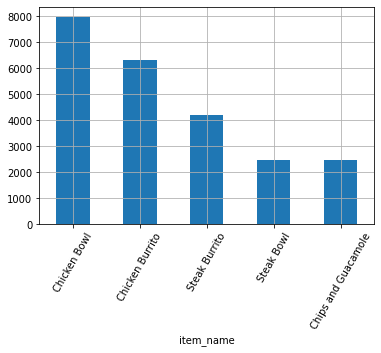

In [20]:
# vẽ biểu đồ Bar
df_ = df.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head()
df_.plot.bar(rot=60, grid=True);

In [21]:
# cho biết 5 món ăn được đặt nhiều nhất
df.groupby('item_name').size().sort_values(ascending=False).head()

item_name
Chicken Bowl           717
Chicken Burrito        546
Chips and Guacamole    474
Steak Burrito          365
Canned Soft Drink      290
dtype: int64

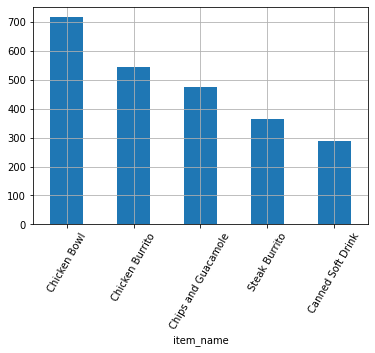

In [22]:
# vẽ biểu đồ Bar
df_ = df.groupby('item_name').size().sort_values(ascending=False).head()
df_.plot.bar(rot=60, grid=True);

## 5. Rút trích theo điều kiện

In [23]:
# cho biết món ăn nào có số lượng đặt nhiều nhất
df[df['quantity']==df['quantity'].max()][['order_id','item_name','quantity']]

,order_id,item_name,quantity
3598,1443,Chips and Fresh Tomato Salsa,15


In [24]:
# cho biết đơn đặt hàng nào đặt nhiều món ăn nhất
df_ = df['order_id'].value_counts().head(1)
df_

926    21
Name: order_id, dtype: int64

In [25]:
# liệt kê các món ăn được đặt
df[df['order_id']==df_.index[0]]

,order_id,item_name,quantity,item_price,revenue
2304,926,Steak Burrito,1,9.25,9.25
2305,926,Chicken Bowl,1,8.75,8.75
2306,926,Chicken Bowl,1,8.75,8.75
2308,926,Steak Bowl,1,9.25,9.25
2309,926,Chicken Bowl,1,8.75,8.75
2310,926,Steak Burrito,1,9.25,9.25
2311,926,Chicken Burrito,1,8.75,8.75
2312,926,Chicken Bowl,1,8.75,8.75
2313,926,Chicken Bowl,1,8.75,8.75
2314,926,Chicken Salad Bowl,1,8.75,8.75


In [26]:
# cho biết đơn đặt hàng nào có tổng thành tiền lớn nhất
df_ = df.groupby('order_id')['revenue'].sum()
max_revenue = df_.max()
df_[df_==max_revenue]

order_id
1443    1074.24
Name: revenue, dtype: float64

## 6. Tính toán

In [27]:
# cho biết tổng doanh thu trong ngày
df['revenue'].sum()

38914.11

In [28]:
# cho biết món ăn nào được đặt nhiều nhất
df['item_name'].value_counts().head(1)

Chicken Bowl    717
Name: item_name, dtype: int64

In [29]:
# cho biết thành tiền nhỏ nhất, lớn nhất và trung bình của các hóa đơn
df_ = df.groupby('order_id')['revenue'].sum()
df_.agg(['min','max','mean'])

min        8.750000
max     1074.240000
mean      21.218162
Name: revenue, dtype: float64

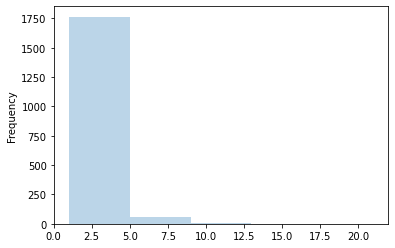

In [30]:
# vẽ biểu đồ Histogram biểu diễn: trục y là đếm số đơn đặt hàng; trục x là số món ăn đặt
# vẽ với bins=5
df_ = df.groupby('order_id').size()
df_.plot.hist(bins=5, alpha=0.3);